<a href="https://colab.research.google.com/github/leiparov/machinelearning/blob/master/DefaultCreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de los Datos

In [0]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/gdrive')
#%cd ..

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
%cd ..

/


In [0]:
data = pd.read_csv("CreditCardData.csv", skiprows = 1)
#data = pd.read_csv("gdrive/My Drive/MachineLearning/Aprendizaje Automatico/Proyecto de clase/Notebooks/CreditCardData.csv", skiprows = 1)

In [0]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
data.groupby(["SEX"])['default payment next month'].value_counts()

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default payment next month, dtype: int64

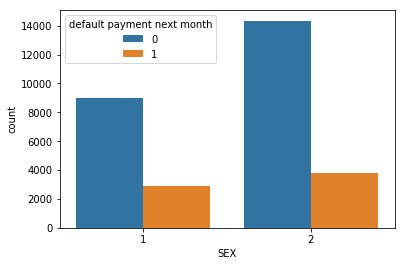

In [0]:
if sns.__version__ >= '0.9.0':
    sns.countplot(x='SEX', hue='default payment next month', data=data)
    plt.show()

In [0]:
for c in data.columns:
  print(type(data[c]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Otros

In [0]:
cat_vars = [c for c in data if not pd.api.types.is_numeric_dtype(data[c])]
cat_vars

[]

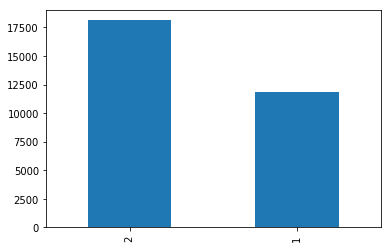

In [0]:
#Transformando variables a categóricas
data['SEX'].astype('category', inplace = True)
data["SEX"].value_counts().plot(kind = 'bar')

In [0]:
var = ["SEX", "EDUCATION", "MARRIAGE", "AGE", "default payment next month"]
data[var].describe()

data.groupby("default payment next month").count()/len(data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,,,,,,,
0,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788
1,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212


Text(0.5, 0.98, 'Categorical Plotting')

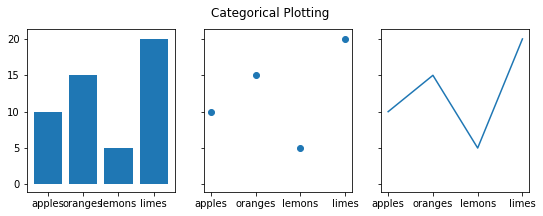

In [0]:

import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
data["SEX"].value_counts().plot(kind = 'bar')
fig.suptitle('Categorical Plotting')

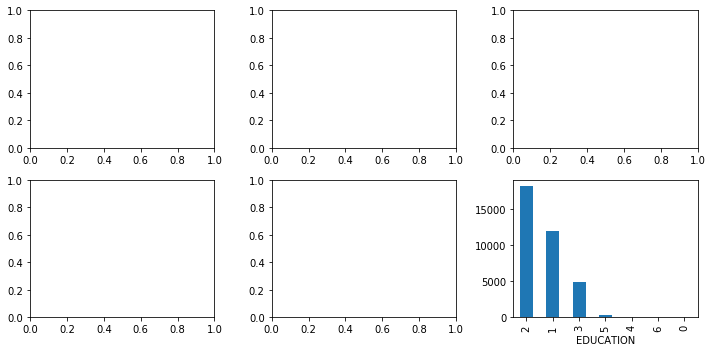

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

axes[0,0] = data["SEX"].value_counts().plot(kind = 'bar').set_xlabel("SEX")
axes[0,1] = data["EDUCATION"].value_counts().plot(kind = 'bar').set_xlabel("EDUCATION")

plt.tight_layout()

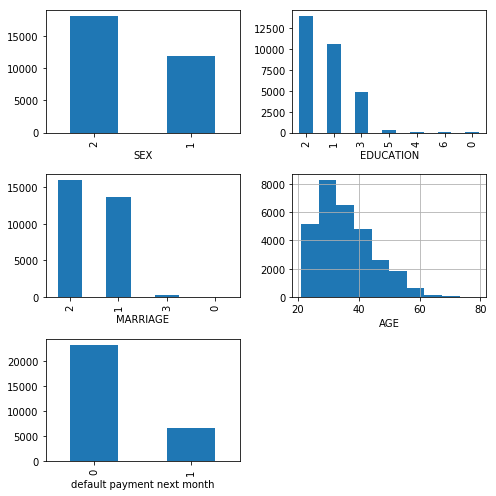

In [0]:
#Gráficos Estadísticos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7,7))
cols = ["SEX", "EDUCATION", "MARRIAGE", "AGE", "default payment next month"]
#axes[0,0] = data["SEX"].hist()
for c,ax in zip(data[cols], axes.flatten()):
  if c in ["AGE"]:
    p = data[c].hist(ax=ax)
    p.set_xlabel(c)
  else:
    p = data[c].value_counts().plot(kind = 'bar', ax = ax)
    p.set_xlabel(c)
axes[2,1].remove()
plt.tight_layout()

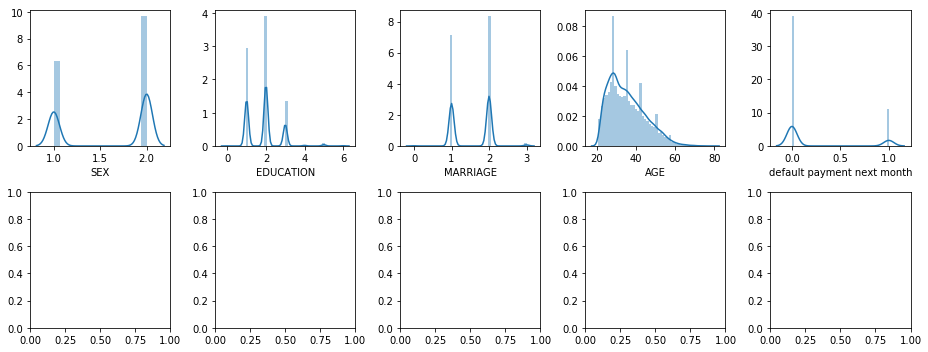

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,5))

for c,ax in zip(data[cols], axes.flatten()):
    sns.distplot(data[c], ax=ax)
    
plt.tight_layout()

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment nex month']

TypeError: ignored

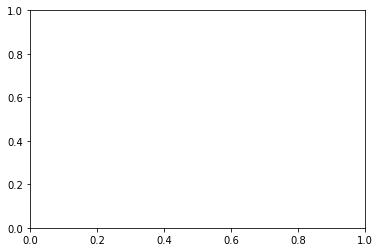

In [0]:
g = sns.barplot(x="SEX", y = "EDUCATION", data=data,
                height=6, kind="bar", palette="muted")
#g.despine(left=True)
g.set_ylabels("survival probability")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc088fbd780>,
      dtype=object)

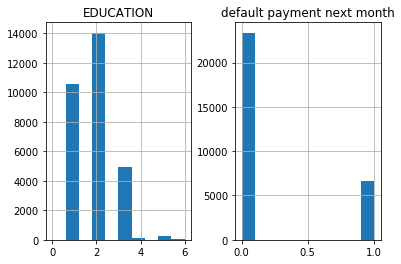

In [0]:
data[['EDUCATION', 'default payment next month']].hist()